In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import date
import seaborn as sns
from datetime import datetime 

import warnings
warnings.filterwarnings('ignore')

## 1. Tiền xử lý dữ liệu

In [2]:
train_df = pd.read_csv('clean_data.csv')
train_df_temp = train_df.copy()
train_df_temp.head()

,Id,Title,Price(Triệu/tháng),Square(m²),District,City,Date
0,478324,Cho thuê phòng để ở tại 108/64A1 Trần Quang Di...,3.5,18.0,Quận 3,Hồ Chí Minh,2020-06-20
1,728993,Phòng vừa xây xong thoáng mát gần các trường Đ...,3.3,25.0,Quận 7,Hồ Chí Minh,2018-10-17
2,781296,Cần share lại gấp phòng trọ mới thuê tại đường...,3.0,15.0,Quận 10,Hồ Chí Minh,2018-10-05
3,781448,Chính chủ cho thuê căn hộ dịch vụ gần sân bay ...,7.0,27.0,Tân Bình,Hồ Chí Minh,2018-10-06
4,789361,"Phòng cho thuê giá rẻ, Quận Gò Vấp gần chung c...",1.7,12.0,Gò Vấp,Hồ Chí Minh,2018-10-09


### 1.1 Bỏ đi những cột không cần thiết

In [3]:
train_df_temp.drop('City', axis= 1, inplace = True)
train_df_temp.drop('Date', axis= 1, inplace = True)

### 1.2 Tạo thêm Features cho dataframe

Dựa vào đặc trưng: 'Title' để tạo thêm 6 đặc trưng: isNew(phòng mới hay cũ) , hasFurniture (có nội thất không), liveTogether(ở ghép/ktx), isWholeHouse (có phải nhà nguyên căn không), isApartment (có phải căn hộ không), isNearCenter (có gần trung tâm không)

In [4]:
def isWholeHouse(df):
	df["Title"] = df["Title"].str.lower()
	e = ['nguyên']
	df['isWholeHouse'] = df["Title"].apply(lambda x: 'yes' if any(i in x for i in e) else 'no')
	return df

In [5]:
def isLiveTogether(df):
	df["Title"] = df["Title"].str.lower()
	e = ['ghép','share',"ktx",'túc']
	df['isLiveTogether'] = df["Title"].apply(lambda x: 'yes' if any(i in x for i in e) else 'no')
	return df

In [6]:
def isApartment(df):
	df["Title"] = df["Title"].str.lower()
	e = ['hộ','cư', 'chdv']
	df['isApartment'] = df["Title"].apply(lambda x: 'yes' if any(i in x for i in e) else 'no')
	return df

In [7]:
def isNew(df):
	df["Title"] = df["Title"].str.lower()
	e = ['mới', 'vừa', 'xây']
	df['isNew'] = df["Title"].apply(lambda x: 'yes' if any(i in x for i in e) else 'no')
	return df

In [8]:
def isNearCenter(df):
	df["Title"] = df["Title"].str.lower()
	e = ['tâm', 'tam']
	df['isNearCenter'] = df["Title"].apply(lambda x: 'yes' if any(i in x for i in e) else 'no')
	return df

In [9]:
def hasFurniture(df):
	df["Title"] = df["Title"].str.lower()
	e = ['nội thất', 'noi that', 'tiện nghi','tiện ích','cao cấp','cao cap','hiện đại','hien dai']
	df['hasFurniture'] = df["Title"].apply(lambda x: 'yes' if any(i in x for i in e) else 'no')
	return df

In [10]:
train_df_temp = isNew(train_df_temp)
train_df_temp = isNearCenter(train_df_temp)
train_df_temp = hasFurniture(train_df_temp)
train_df_temp = isWholeHouse(train_df_temp)
train_df_temp = isLiveTogether(train_df_temp)
train_df_temp = isApartment(train_df_temp)

In [12]:
train_df_temp.head()

,Id,Title,Price(Triệu/tháng),Square(m²),District,isNew,isNearCenter,hasFurniture,isWholeHouse,isLiveTogether,isApartment
0,478324,cho thuê phòng để ở tại 108/64a1 trần quang di...,3.5,18.0,Quận 3,no,no,no,no,no,no
1,728993,phòng vừa xây xong thoáng mát gần các trường đ...,3.3,25.0,Quận 7,yes,no,no,no,no,no
2,781296,cần share lại gấp phòng trọ mới thuê tại đường...,3.0,15.0,Quận 10,yes,no,no,no,yes,no
3,781448,chính chủ cho thuê căn hộ dịch vụ gần sân bay ...,7.0,27.0,Tân Bình,no,no,no,no,no,yes
4,789361,"phòng cho thuê giá rẻ, quận gò vấp gần chung c...",1.7,12.0,Gò Vấp,no,no,no,no,no,yes


In [13]:
train_df_temp.shape

(1131, 11)

### 1.3 Xác định biến Categorical/Numeric

In [14]:
train_df_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1131 entries, 0 to 1130
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Id                  1131 non-null   int64  
 1   Title               1131 non-null   object 
 2   Price(Triệu/tháng)  1131 non-null   float64
 3   Square(m²)          1131 non-null   float64
 4   District            1131 non-null   object 
 5   isNew               1131 non-null   object 
 6   isNearCenter        1131 non-null   object 
 7   hasFurniture        1131 non-null   object 
 8   isWholeHouse        1131 non-null   object 
 9   isLiveTogether      1131 non-null   object 
 10  isApartment         1131 non-null   object 
dtypes: float64(2), int64(1), object(8)
memory usage: 97.3+ KB


In [15]:
# Biến Categorical
cat_vars = ['District', 'isNew', 'hasFurniture', 'isLiveTogether','isNearCenter','isWholeHouse','isApartment']
# Biến numerical
num_vars = ['Price(Triệu/tháng)', 'Square(m²)']

Với biến numerical, nhóm dùng distplot để vẽ biểu đồ phân bố của 2 đặc trưng: Price và Square để quan sát

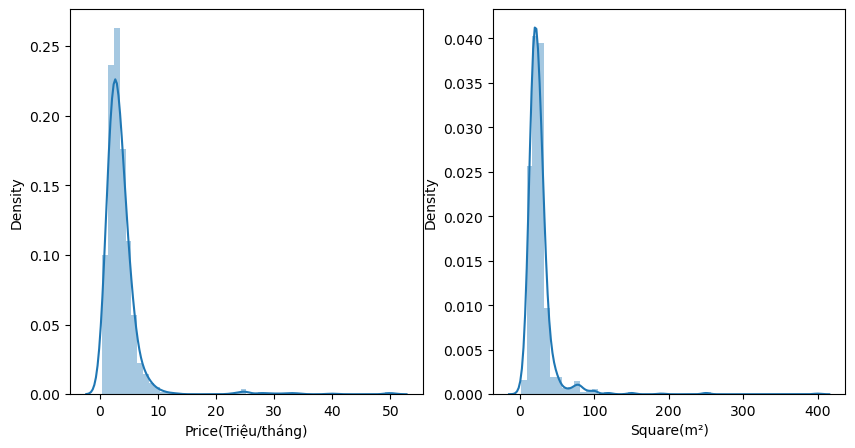

In [16]:
plt.figure(figsize = (10, 5))
plt.subplot(121)
sns.distplot(train_df_temp[num_vars[0]])
plt.subplot(122)
sns.distplot(train_df_temp[num_vars[1]])
plt.show()

Ta thấy ở thuộc tính giá dữ liệu tập trung dưới 10 triệu và ở diện tích dữ liệu tập trung dưới 100 triệu nên ta sẽ loại những dòng trên 10 triệu (giá) và 100 m^2 (Diện tích)

In [17]:
train_df_temp.drop(train_df_temp[train_df_temp['Price(Triệu/tháng)'] > 10].index, inplace = True)
train_df_temp.drop(train_df_temp[train_df_temp['Square(m²)'] > 100].index, inplace = True)

In [18]:
train_df_temp.describe()

,Id,Price(Triệu/tháng),Square(m²)
count,1.104000e+03,1104.000000,1104.000000
mean,1.509372e+06,3.236023,24.296694
std,3.364886e+05,1.662718,11.186133
min,4.783240e+05,0.450000,1.000000
25%,1.443634e+06,2.000000,18.000000
50%,1.561906e+06,3.000000,22.000000
75%,1.741202e+06,4.000000,30.000000
max,2.127970e+06,10.000000,100.000000


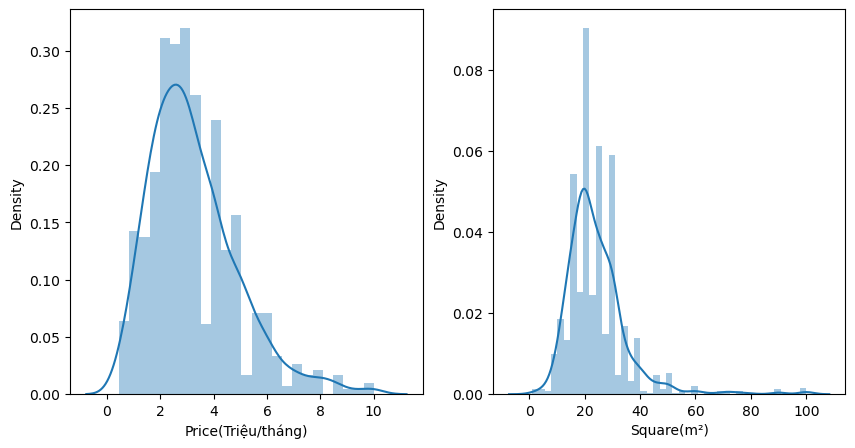

In [22]:
plt.figure(figsize = (10, 5))
plt.subplot(121)
sns.distplot(train_df_temp[num_vars[0]])
plt.subplot(122)
sns.distplot(train_df_temp[num_vars[1]])
plt.show()

### 1.4 Loại bỏ outliers

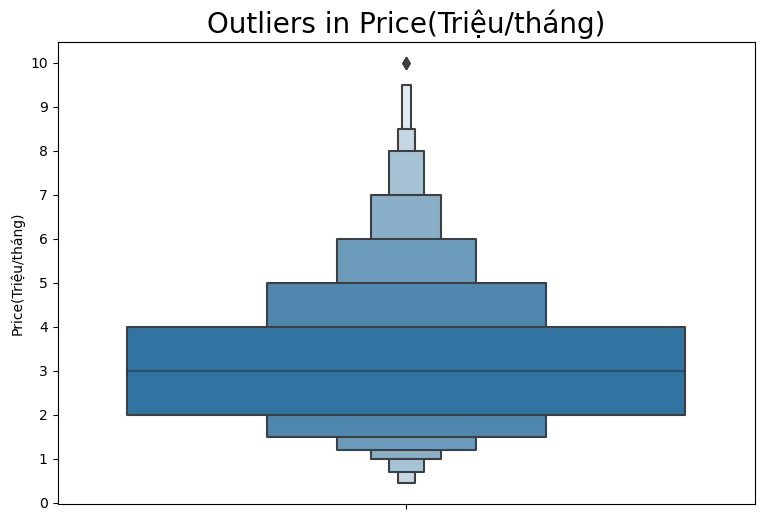

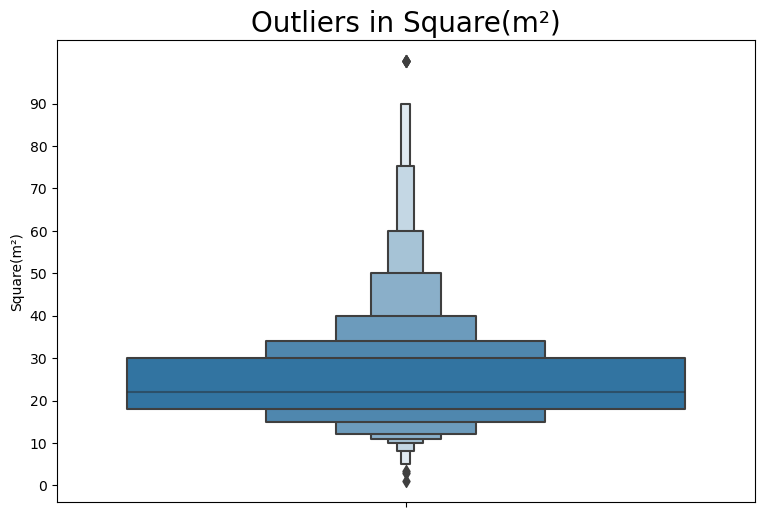

In [29]:
for col in num_vars:
	plt.figure(figsize=(9,6))
	sns.boxenplot(y=col,data=train_df_temp)
	plt.title('Outliers in {}'.format(col),fontsize=20,fontweight=5)
	if col == 'Price(Triệu/tháng)':
		plt.yticks(range(0,11,1))
	if col == 'Square(m²)':
		plt.yticks(range(0,100,10))
	plt.show()

* Price(Triệu/tháng):
	Outliers nằm ở khoảng 10 triệu/tháng.
* Square(m2):
	Outliers nằm ở khoảng trên 90 m2 và dưới 5 m2
	
Ta loại bỏ những dữ liệu này để tránh ảnh hưởng

## 2. Chọn các đặc trưng để xây dựng mô hình
### 2.1 Ta sẽ chuyển các cột dạng Categorical sang Numerical
Ta sẽ dùng hàm get_dummies để chuyển cột dạng Categorical sang Numerical theo phương pháp one hot encoding

Lý do dùng: Vì các cột dạng categorical không có dạng order (có thứ tự) nên dùng one hot encoding sẽ đem lại hiệu quả cao hơn so với phương pháp encoding khác

In [39]:
df_new = train_df_temp.drop(columns=['Id', 'Title', 'Price(Triệu/tháng)', 'Square(m²)'])
df_new

,District,isNew,isNearCenter,hasFurniture,isWholeHouse,isLiveTogether,isApartment
0,Quận 3,no,no,no,no,no,no
1,Quận 7,yes,no,no,no,no,no
2,Quận 10,yes,no,no,no,yes,no
3,Tân Bình,no,no,no,no,no,yes
4,Gò Vấp,no,no,no,no,no,yes
...,...,...,...,...,...,...,...
1126,Quận 10,no,no,no,no,no,no
1127,Quận 4,no,no,no,no,no,no
1128,Bình Thạnh,no,no,no,yes,no,no
1129,Tân Phú,no,no,yes,no,no,no


In [40]:
df_new = pd.get_dummies(df_new)
df_new

,District_Bình Chánh,District_Bình Thạnh,District_Bình Tân,District_Gò Vấp,District_Hóc Môn,District_Nhà Bè,District_Phú Nhuận,District_Quận 1,District_Quận 10,District_Quận 11,...,isNearCenter_no,isNearCenter_yes,hasFurniture_no,hasFurniture_yes,isWholeHouse_no,isWholeHouse_yes,isLiveTogether_no,isLiveTogether_yes,isApartment_no,isApartment_yes
0,0,0,0,0,0,0,0,0,0,0,...,1,0,1,0,1,0,1,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,1,0,1,0,1,0,1,0,1,0
2,0,0,0,0,0,0,0,0,1,0,...,1,0,1,0,1,0,0,1,1,0
3,0,0,0,0,0,0,0,0,0,0,...,1,0,1,0,1,0,1,0,0,1
4,0,0,0,1,0,0,0,0,0,0,...,1,0,1,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1126,0,0,0,0,0,0,0,0,1,0,...,1,0,1,0,1,0,1,0,1,0
1127,0,0,0,0,0,0,0,0,0,0,...,1,0,1,0,1,0,1,0,1,0
1128,0,1,0,0,0,0,0,0,0,0,...,1,0,1,0,0,1,1,0,1,0
1129,0,0,0,0,0,0,0,0,0,0,...,1,0,0,1,1,0,1,0,1,0


In [41]:
df_new['Price'] = train_df_temp['Price(Triệu/tháng)']
df_new['Square'] = train_df_temp['Square(m²)']
df_new

,District_Bình Chánh,District_Bình Thạnh,District_Bình Tân,District_Gò Vấp,District_Hóc Môn,District_Nhà Bè,District_Phú Nhuận,District_Quận 1,District_Quận 10,District_Quận 11,...,hasFurniture_no,hasFurniture_yes,isWholeHouse_no,isWholeHouse_yes,isLiveTogether_no,isLiveTogether_yes,isApartment_no,isApartment_yes,Price,Square
0,0,0,0,0,0,0,0,0,0,0,...,1,0,1,0,1,0,1,0,3.5,18.0
1,0,0,0,0,0,0,0,0,0,0,...,1,0,1,0,1,0,1,0,3.3,25.0
2,0,0,0,0,0,0,0,0,1,0,...,1,0,1,0,0,1,1,0,3.0,15.0
3,0,0,0,0,0,0,0,0,0,0,...,1,0,1,0,1,0,0,1,7.0,27.0
4,0,0,0,1,0,0,0,0,0,0,...,1,0,1,0,1,0,0,1,1.7,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1126,0,0,0,0,0,0,0,0,1,0,...,1,0,1,0,1,0,1,0,5.0,16.0
1127,0,0,0,0,0,0,0,0,0,0,...,1,0,1,0,1,0,1,0,2.5,20.0
1128,0,1,0,0,0,0,0,0,0,0,...,1,0,0,1,1,0,1,0,2.0,6.0
1129,0,0,0,0,0,0,0,0,0,0,...,0,1,1,0,1,0,1,0,2.9,22.0


### 2.2 Bỏ đi những cột có tương quan thấp với giá
Đối với những cột có độ tương quan với giá thấp hơn 0.01 (không ảnh hưởng nhiều), ta sẽ bỏ đi.

In [42]:
corr_price = df_new.corr()['Price']
drop_columns = corr_price[abs(corr_price)<0.01].index
df_new.drop(columns = drop_columns,inplace = True)

Như vậy, ta sẽ sử dụng những đặc trưng như sau để xây dựng mô hình

In [32]:
df_new.drop(columns='Price').columns

Index(['District_Bình Chánh', 'District_Bình Thạnh', 'District_Bình Tân',
       'District_Gò Vấp', 'District_Hóc Môn', 'District_Nhà Bè',
       'District_Phú Nhuận', 'District_Quận 1', 'District_Quận 10',
       'District_Quận 11', 'District_Quận 12', 'District_Quận 2',
       'District_Quận 3', 'District_Quận 5', 'District_Quận 6',
       'District_Quận 7', 'District_Quận 8', 'District_Quận 9',
       'District_Thủ Đức', 'District_Tân Bình', 'District_Tân Phú', 'isNew_no',
       'isNew_yes', 'isNearCenter_no', 'isNearCenter_yes', 'hasFurniture_no',
       'hasFurniture_yes', 'isWholeHouse_no', 'isWholeHouse_yes',
       'isLiveTogether_no', 'isLiveTogether_yes', 'isApartment_no',
       'isApartment_yes', 'Square'],
      dtype='object')

## 3. Xây dựng mô hình

In [48]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
import time

In [49]:
X = df_new.drop(columns=['Price'])
y = df_new['Price']

### 3.1 Chuẩn hoá dữ liệu
Ta dùng phương pháp MinMaxScaler để scale dữ liệu về khoảng [0,1]

Lý do dùng: vì đã xử lý các outliers và dữ liệu không theo dạng phân phối chuẩn.

Đã thử giữ lại các outliers, không bỏ đi các Feature và dùng phương pháp RobustScaler , tuy nhiên kết quả lại không tốt bằng. Vì thế nên tôi quyết định dùng MinMaxScaler.

In [50]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit_transform(X,y)

array([[0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.17171717],
       [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.24242424],
       [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.14141414],
       ...,
       [0.        , 1.        , 0.        , ..., 1.        , 0.        ,
        0.05050505],
       [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.21212121],
       [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.52020202]])

### 3.2 Chia các tập train, test
Chia tập train/test với tỷ lệ là 75:25

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state=42)

### 3.3 Chọn các mô hình tốt nhất
Ta sẽ dùng phương pháp K Fold Cross Validation để đánh giá và chọn ra các mô hình tốt nhất. Sau khi chạy thử với nhiều k thì tụi em chọn k=7 vì nó có hiệu quả tốt nhất.

Lý do dùng: Bởi vì tập dữ liệu khá nhỏ, nếu chia ra các tập train/val/test thì không thật sự đo được độ hiệu quả của mô hình (vì mỗi tập quá ít dữ liệu). Dùng K Fold Cross Validation thì mọi phần trong tập train sẽ được dùng cho cả việc train và test, nhờ đó ta sẽ đánh giá chính xác hơn độ hiệu quả của mô hình.

In [52]:
from sklearn.model_selection import cross_val_score

Ta sẽ chọn các thuật toán là LinearRegression, Ridge, Lasso, KNeighborsRegressor, RandomForestRegressor

In [53]:
model = LinearRegression()
scores = cross_val_score(model, X_train, y_train, cv=7)
scores.mean().round(5)

0.51077

In [54]:
model = Ridge()
scores = cross_val_score(model, X_train, y_train, cv=7)
scores.mean().round(5)

0.51213

In [55]:
model = Lasso()
scores = cross_val_score(model, X_train, y_train, cv=7)
scores.mean().round(5)

0.12557

In [56]:
model = KNeighborsRegressor()
scores = cross_val_score(model, X_train, y_train, cv=7)
scores.mean().round(5)

0.40191

In [57]:
model = RandomForestRegressor()
scores = cross_val_score(model, X_train, y_train, cv=7)
scores.mean().round(5)

0.49905

Ta sẽ chọn ra 3 mô hình có điểm cao nhất là LinearRegression, Ridge, RandomForestRegressor